In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from enum import Enum
import requests
import pandas as pd
import numpy as np
import datetime
import collections as col
import scipy as sp
import time

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
SYMBOL_STATUS = Enum('SYMBOL_STATUS', 'PRE_TRADING TRADING POST_TRADING END_OF_DAY HALT AUCTION_MATCH BREAK')
SYMBOL_TYPE = Enum('SYMBOL_TYPE', 'SPOT')
ORDER_STATUS = Enum('ORDER_STATUS', 'NEW PARTIALLY_FILLED FILLED CANCELED PENDING_CANCEL REJECTED EXPIRED')
ORDER_TYPES = Enum('ORDER_TYPES', 'LIMIT MARKET STOP_LOSS STOP_LOSS_LIMIT TAKE_PROFIT TAKE_PROFIT_LIMIT LIMIT_MAKER')
ORDER_SIDE = Enum('ORDER_SIDE', 'BUY SELL')
TIME_FORCE = Enum('TIME_FORCE', 'GTC IOK FOK')
CANDLE_INT = Enum('CANDLE_INT', '1m 3m 5m 15m 30m 1h 2h 4h 6h 8h 12h 1d 3d 1w 1M')
RATE_LIMIT = Enum('RATE_LIMIT', 'REQUESTS ORDERS')
RATE_LIMIT_INT = Enum('RATE_LIMIT_INT', 'SECOND MINUTE DAY')

In [5]:
BASE_ENDPOINT = 'https://api.binance.com'

# Public Endpoints
TEST_CONNECT = '/api/v1/ping'
SERVER_TIME = '/api/v1/time'

CANDLE = '/api/v1/klines'

In [6]:
def collectOLHCData(symbol):
    data = []
    counter = 1000
    endTime = int(time.time()*1000)
    df = pd.DataFrame(data=None, columns=['OPEN_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'CLOSE_TIME', 'QUOTE_VOL', 'NUM_TRADES', 'TAKE_BASE_VOL', 'TAKE_QUOTE_VOL', 'EXTRA'])
    while(counter > 0):
        counter -= 1
        response = requests.get(BASE_ENDPOINT+CANDLE+'?symbol='+symbol+'&interval=1m&endTime='+str(endTime))
        df = pd.DataFrame(
            data=np.array(response.json()), 
            columns=['OPEN_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'CLOSE_TIME', 'QUOTE_VOL', 'NUM_TRADES', 'TAKE_BASE_VOL', 'TAKE_QUOTE_VOL', 'EXTRA']
        )
        data.append(df)
        endTime = int(df.OPEN_TIME.min())-1
    return pd.concat(data, ignore_index=True).sort_values(by='OPEN_TIME')

In [7]:
symbol = 'ETHBTC'
df = collectOLHCData(symbol)
df.shape

(500000, 12)

In [8]:
# Post processing
df = df.replace(to_replace='\.', value='', regex=True).reset_index(drop=True)

df.OPEN  = df.OPEN.astype(int)
df.HIGH  = df.HIGH.astype(int)
df.LOW   = df.LOW.astype(int)
df.CLOSE = df.CLOSE.astype(int)
df.VOLUME = df.VOLUME.astype(int)
df.QUOTE_VOL = df.QUOTE_VOL.astype(int)
df.TAKE_BASE_VOL = df.TAKE_BASE_VOL.astype(int)
df.TAKE_QUOTE_VOL = df.TAKE_QUOTE_VOL.astype(int)

In [10]:
df.head()

,OPEN_TIME,OPEN,HIGH,LOW,CLOSE,VOLUME,CLOSE_TIME,QUOTE_VOL,NUM_TRADES,TAKE_BASE_VOL,TAKE_QUOTE_VOL,EXTRA
0,1517303100000,10629400,10673700,10629300,10640100,17785000000,1517303159999,1892484646,412,10429400000,1110434538,0
1,1517303160000,10640100,10643300,10619800,10630100,15433400000,1517303219999,1640768918,276,4288000000,456085864,0
2,1517303220000,10621100,10640000,10621000,10625000,9354600000,1517303279999,994314138,255,4298600000,457129449,0
3,1517303280000,10626200,10634500,10622600,10630800,6746400000,1517303339999,716919384,184,3005400000,319476265,0
4,1517303340000,10630800,10639000,10622600,10632600,7650900000,1517303399999,813139316,182,3471000000,369112330,0


In [11]:
df.tail()

,OPEN_TIME,OPEN,HIGH,LOW,CLOSE,VOLUME,CLOSE_TIME,QUOTE_VOL,NUM_TRADES,TAKE_BASE_VOL,TAKE_QUOTE_VOL,EXTRA
499995,1547497860000,3486700,3492000,3486600,3491600,8410900000,1547497919999,293468581,118,5933700000,207051673,0
499996,1547497920000,3490400,3490900,3486300,3489000,15189500000,1547497979999,529903878,167,11300100000,394193104,0
499997,1547497980000,3488800,3489900,3486500,3489600,10200300000,1547498039999,355791960,126,6543900000,228242885,0
499998,1547498040000,3489600,3489900,3484700,3487200,8049800000,1547498099999,280780507,129,4591400000,160168024,0
499999,1547498100000,3487200,3489500,3486300,3487500,9342600000,1547498159999,325861346,165,6400400000,223260630,0


In [12]:
strt = df.iloc[1].OPEN_TIME
end = df.iloc[-1].OPEN_TIME

strt
end

u'1517303160000'

u'1547498100000'

In [13]:
df.to_csv('data/ETHBTC_'+strt+'_'+end+'.csv', index=False)

In [15]:
df.OPEN = df.OPEN.astype(float)
df.CLOSE = df.CLOSE.astype(float)
df.HIGH = df.HIGH.astype(float)
df.LOW = df.LOW.astype(float)

df.VOLUME = df.VOLUME.astype(float)
df.QUOTE_VOL = df.QUOTE_VOL.astype(float)
df.TAKE_BASE_VOL = df.TAKE_BASE_VOL.astype(float)
df.TAKE_QUOTE_VOL = df.TAKE_QUOTE_VOL.astype(float)

df.OPEN_TIME = df.OPEN_TIME.astype(int)
df.OPEN_TIME = df.OPEN_TIME/1000
df.OPEN_TIME = df.OPEN_TIME.apply(datetime.datetime.fromtimestamp)
df.CLOSE_TIME = df.CLOSE_TIME.astype(int)
df.CLOSE_TIME = df.CLOSE_TIME/1000
df.CLOSE_TIME = df.CLOSE_TIME.apply(datetime.datetime.fromtimestamp)

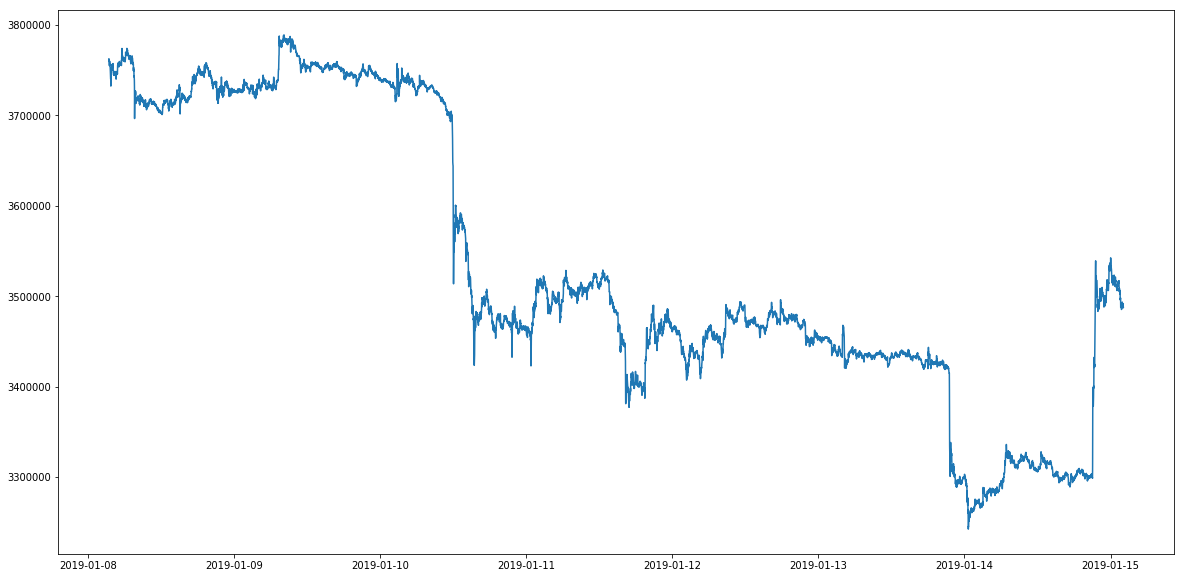

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(df.CLOSE_TIME[-10000:], df.CLOSE.astype(float)[-10000:])
plt.show()